<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Reddit NPL Classfication Challenge
Notebook 2: Data Cleaning, EDA & Feature Engineering

This notebook contains 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#jokes = pd.read_csv('../data/jokes.csv')
#jokes.head()
tales = pd.read_csv('../data/talesfromretail.csv')
tales.head()

,author,title,selftext,score,num_comments,upvote_ratio,created_utc,subreddit
0,NormalDeviance,Fitting rooms are disgusting,"This isn’t so much of a single story, but more...",1,7,1.0,1602294153,TalesFromRetail
1,NormalDeviance,Trying to return year-old worn shoes,Worked at a major department store at the retu...,1,12,1.0,1602288304,TalesFromRetail
2,MaryCranberry,A cashier witnesses true love,I’m a cashier at a store at a ski resort. We h...,1,60,1.0,1602285068,TalesFromRetail
3,tempthethrowaway,Follow My Brownies,"This is my wife's story from today, posted wit...",1,23,1.0,1602283980,TalesFromRetail
4,[deleted],Customer is totally friends with a manager fro...,NaN,1,0,1.0,1602268197,TalesFromRetail


In [3]:
print(f'Jokes shape {jokes.shape}')
print(f'Tales shape {tales.shape}')

Jokes shape (9526, 8)
Tales shape (9434, 8)


### Check Null

In [4]:
#jokes.isnull().sum()
tales.isnull().sum()

author             0
title              0
selftext           2
score              0
num_comments       0
upvote_ratio    8573
created_utc        0
subreddit          0
dtype: int64

In [5]:
#tales.drop(columns = 'upvote_ratio', inplace = True)
jokes.drop(columns = 'upvote_ratio', inplace = True)

In [6]:
#jokes[jokes['selftext'].isnull()]
tales[tales['selftext'].isnull()]

,author,title,selftext,score,num_comments,created_utc,subreddit
4,[deleted],Customer is totally friends with a manager fro...,NaN,1,0,1602268197,TalesFromRetail
180,PlasmaCarrot79,Super Soaker,NaN,1,0,1598471414,TalesFromRetail


In [7]:
#jokes.drop([440, 1598, 8557], inplace = True)
tales.drop([4, 180], inplace =True)

In [8]:
#jokes[jokes.author == '[deleted]']
tales[tales.author == '[deleted]']

,author,title,selftext,score,num_comments,created_utc,subreddit
218,[deleted],Changing room horror story,[deleted],1,0,1597791303,TalesFromRetail


In [9]:
#jokes.drop(33, inplace = True)
tales.drop(218, inplace = True)

In [10]:
#jokes[jokes.selftext == '[deleted]']
tales[tales.selftext == '[deleted]']

,author,title,selftext,score,num_comments,created_utc,subreddit


In [11]:
print(f'Jokes shape {jokes.shape}')
print(f'Tales shape {tales.shape}')

Jokes shape (9522, 7)
Tales shape (9431, 7)


In [12]:
#jokes.dtypes
tales.dtypes

author          object
title           object
selftext        object
score            int64
num_comments     int64
created_utc      int64
subreddit       object
dtype: object

### EDA

#### Jokes Subreddit

In [14]:
jokes.score.describe()

count    9526.000000
mean        1.134789
std         1.439194
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       104.000000
Name: score, dtype: float64

In [15]:
jokes.num_comments.describe()

count    9526.000000
mean        6.390510
std        47.719512
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max      1821.000000
Name: num_comments, dtype: float64

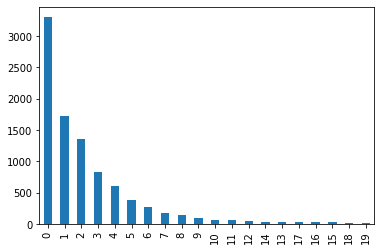

In [16]:
jokes.num_comments.value_counts()[:20].plot.bar();

In [17]:
jokes.num_comments.sort_values(ascending = False).head(10)

3692    1821
7253    1738
3206    1195
861     1099
8372    1055
4440     932
1284     804
3470     715
579      680
1636     663
Name: num_comments, dtype: int64

In [18]:
pd.set_option('display.max_colwidth', 0)

In [19]:
jokes[(jokes.num_comments == 1821) | (jokes.num_comments == 1738) | (jokes.num_comments == 1195) 
      | (jokes.num_comments == 1099) | (jokes.num_comments == 1055)]

,author,title,selftext,score,num_comments,created_utc,subreddit
861,MaxQ50,Smartest president,"An airplane was about to crash. There were 4 passengers on board, but only 3 parachutes.\n\nThe 1st passenger said, 'I am LeBron James, the best NBA basketball player. The Lakers and my millions of fans need me, and I can't afford to die.' So he took the 1st pack and left the plane.\n\nThe 2nd passenger, Donald Trump, said, 'I am the US President, and I am the smartest President in American history, so my people don't want me to die.' He took the 2nd pack and jumped out of the plane.\n\nThe 3rd passenger, the Pope, said to the 4th passenger, a 10-year-old schoolboy, 'My son, I am old and don't have many years left, you have more years ahead so I will sacrifice my life and let you have the last parachute.'\n\nThe little boy said, 'That's okay, Your Holiness, there's a parachute left for you. America 's smartest President took my schoolbag...",1,1099,1602155844,Jokes
3206,Firetrock,Trump might finally get what he wants the most,He might get to be president for the rest of his life.,1,1195,1601685975,Jokes
3692,IAmGoingToBeSerious,Trump tests positive for COVID-19.,"He finally passed a test without cheating, good for him.",1,1821,1601616756,Jokes
7253,cyclopropagative,"I’m American, and I’m sick of people saying America is “the stupidest country in the world.”","Personally, I think Europe is the stupidest country in the world.",1,1738,1600861225,Jokes
8372,IdeaCafe,CAN ADMINS OF THIS SUBREDDIT REDDIT DO A BETTER JOB OF MONITORING WHO IS ALLOWED IN HERE PLEASE?!,"WE HAVE A NEW MEMBER, A WOMAN. SHE’S BEEN PRIVATELY MESSAGING MEMBERS, SENDING THEM NAKED PICTURES OF HERSELF IN NASTY POSES ALONG WITH CLOSE UPS OF HER UNMENTIONABLES. SHE IS OFFERING AN IPHONE 8+ IN EXCHANGE FOR SEXUAL FAVORS. I AM ESPECIALLY BOTHERED BECAUSE IT TURNED OUT TO BE AN IPHONE 6 AND OBVIOUSLY SOMETHING'S WRONG WITH IT. IT'S SUPER SLOW AND THE CAPS LOCK IS STUCK ON.",1,1055,1600620087,Jokes


#### TalesFromRetail Subreddit

### Feature Engineering